In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/pullonPEG/"
print("data path: ", data_path)

level: level2 & tutorial name: polymer-in-water
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level2/polymer-in-water/pullonPEG/


In [5]:
time, distance = np.loadtxt(data_path + "end-to-end-distance.dat").T
time /= 1000 # ps
distance /= 10 # nm
time, radius = np.loadtxt(data_path + "gyration-radius.dat").T
time /= 1000 # ps
radius /= 10 # nm

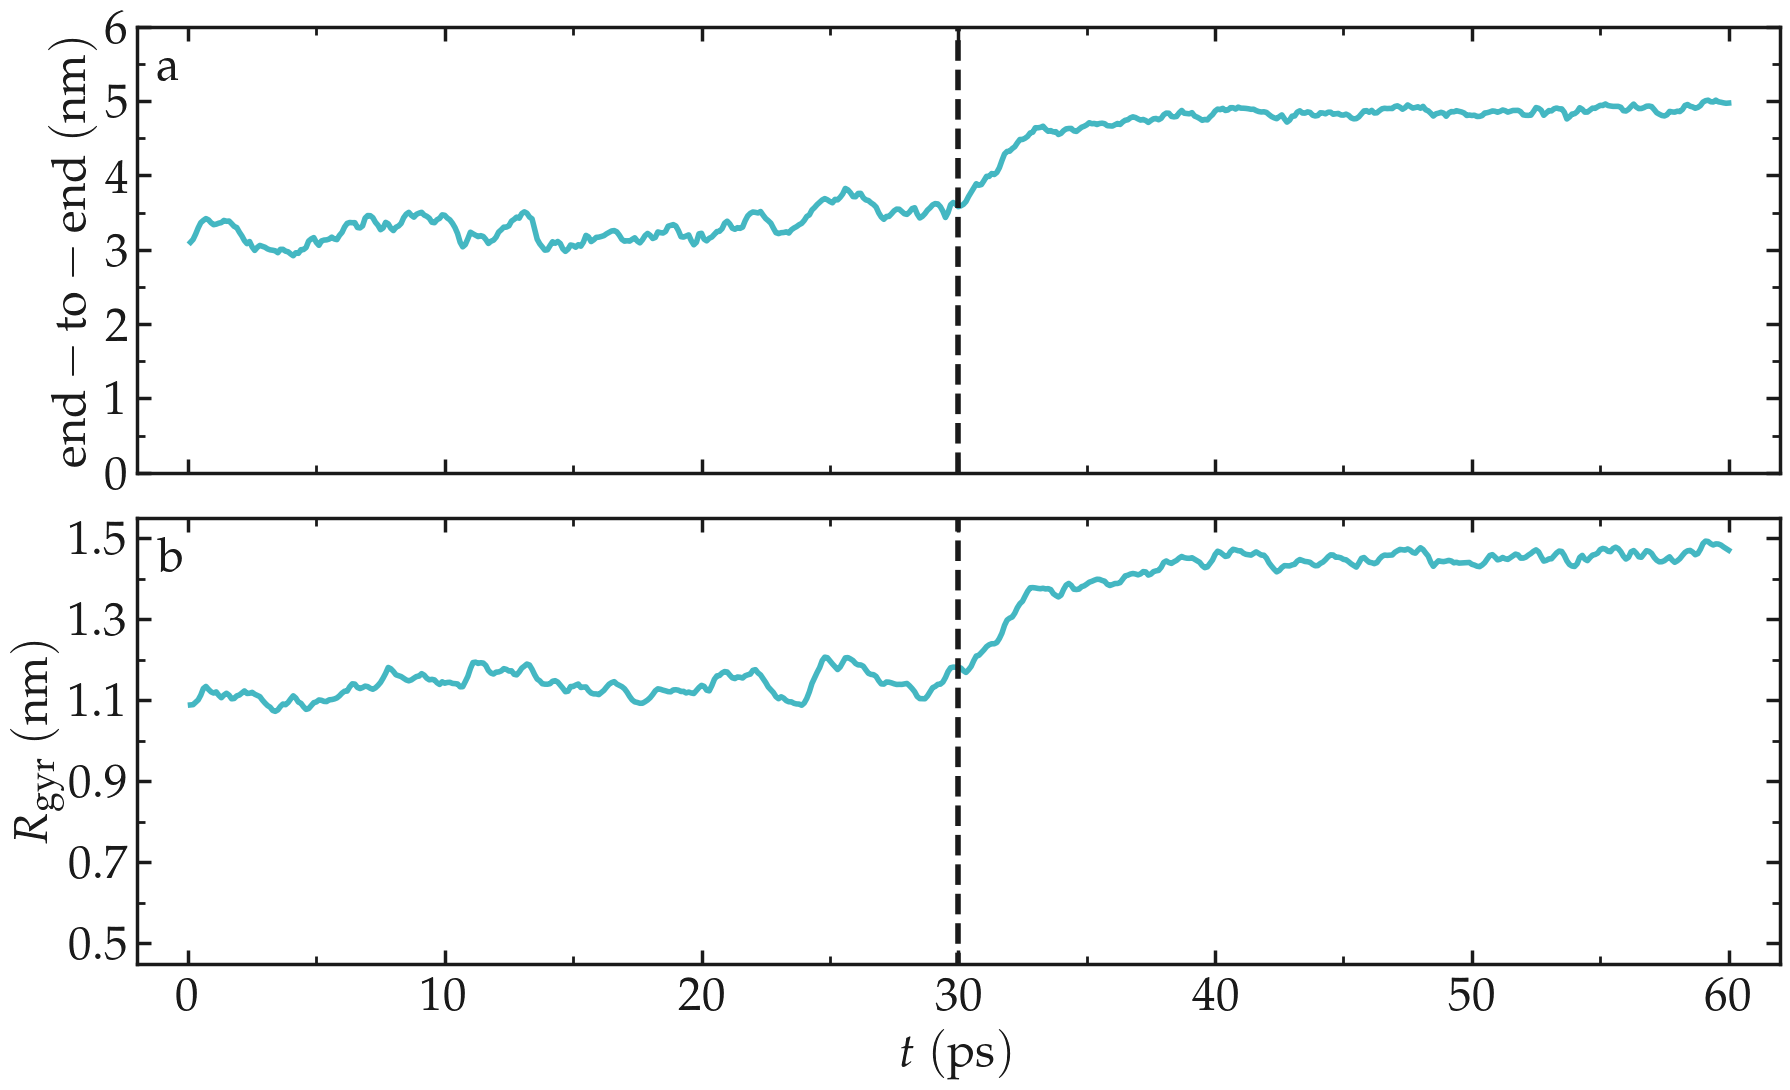

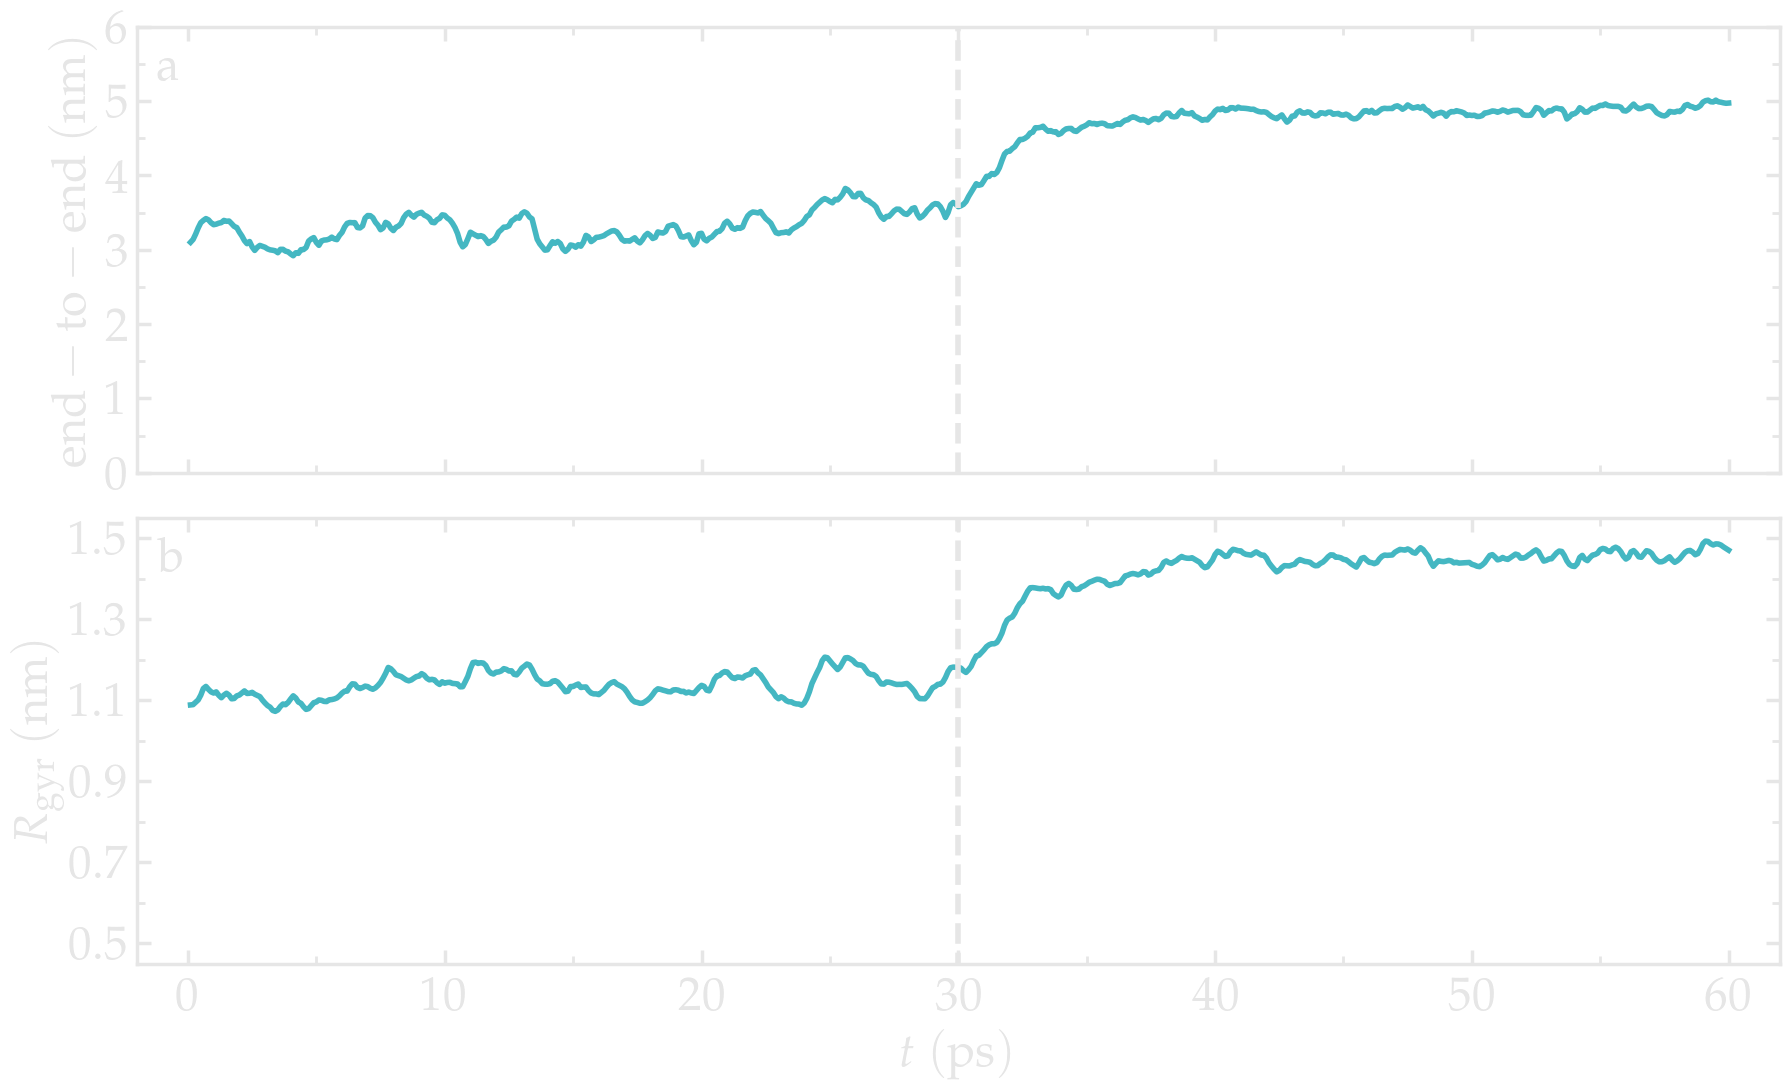

In [14]:
filename = "distance"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,11), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=2)
    myplt.add_panel()
    myplt.add_plot(x = time, y = distance, linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12)
    x = np.arange(0, 60, 0.1)
    myplt.add_plot(x = x*0 + 30, y = x, marker= '--', data_color="autogray", linewidth=3.5)
    myplt.complete_panel(ylabel = r'$\mathrm{end-to-end ~ (nm)}$', xlabel = None,
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 70, 10), y_ticks=np.arange(0, 7, 1),
                   x_boundaries=(-2, 62), y_boundaries=(0, 6))
    myplt.add_panel()
    myplt.add_plot(x = time, y = radius, linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12)
    x = np.arange(0, 60, 0.1)
    myplt.add_plot(x = x*0 + 30, y = x, marker= '--', data_color="autogray", linewidth=3.5)
    myplt.complete_panel(ylabel = r'$R_\mathrm{gyr} ~ (\mathrm{nm})$', xlabel = r'$t ~ \mathrm{(ps)}$',
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 70, 10), y_ticks=np.arange(0.5, 1.6, 0.2),
                   x_boundaries=(-2, 62), y_boundaries=(0.45, 1.55))
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

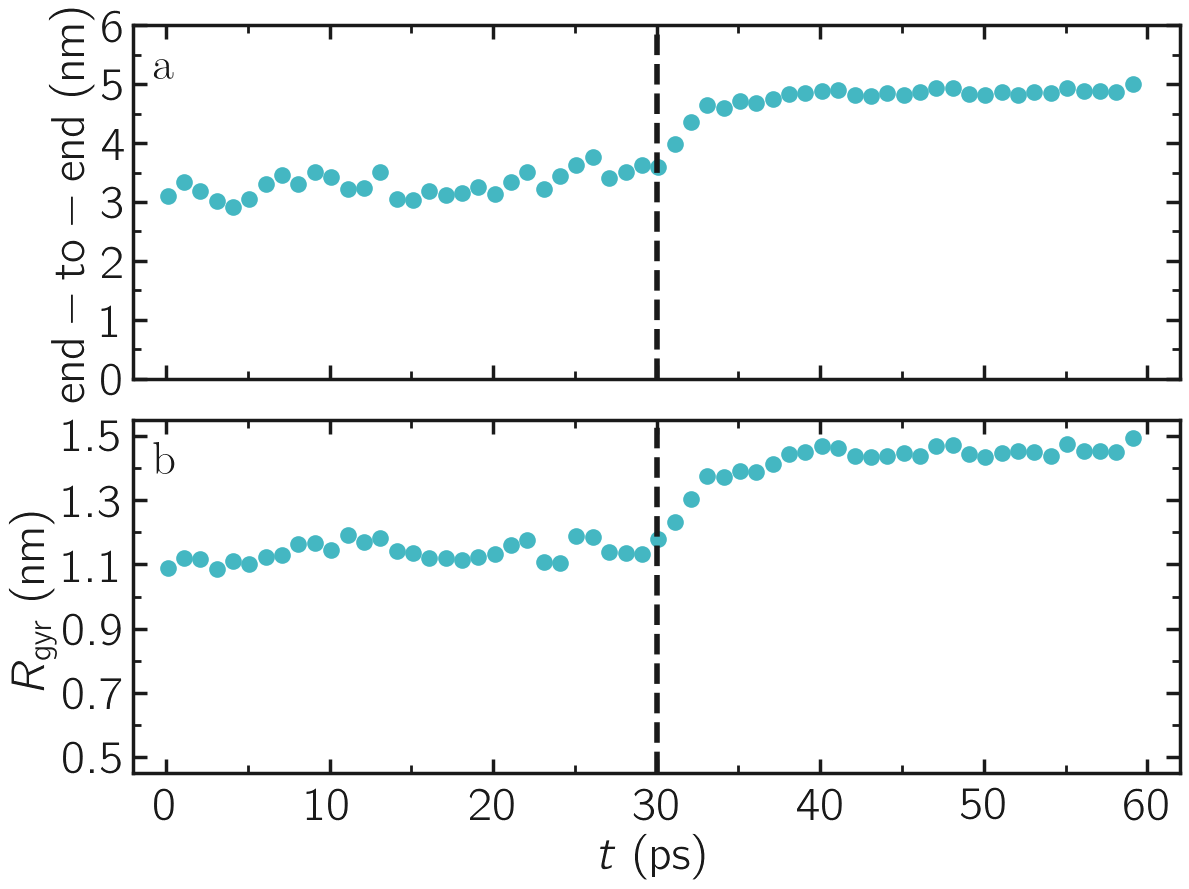

In [17]:
filename = "distance-article"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,9), dark_mode = False,
                    transparency = False, use_serif=False, n_line=2)
myplt.add_panel()
myplt.add_plot(x = time[::10], y = distance[::10], linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12)
x = np.arange(0, 60, 0.1)
myplt.add_plot(x = x*0 + 30, y = x, marker= '--', data_color="autogray", linewidth=3.5)
myplt.complete_panel(ylabel = r'$\mathrm{end-to-end ~ (nm)}$', xlabel = None,
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 70, 10), y_ticks=np.arange(0, 7, 1),
                x_boundaries=(-2, 62), y_boundaries=(0, 6))
myplt.add_panel()
myplt.add_plot(x = time[::10], y = radius[::10], linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12)
x = np.arange(0, 60, 0.1)
myplt.add_plot(x = x*0 + 30, y = x, marker= '--', data_color="autogray", linewidth=3.5)
myplt.complete_panel(ylabel = r'$R_\mathrm{gyr} ~ (\mathrm{nm})$',
                     xlabel = r'$t ~ \mathrm{(ps)}$',
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 70, 10), y_ticks=np.arange(0.5, 1.6, 0.2),
                x_boundaries=(-2, 62), y_boundaries=(0.45, 1.55))
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')